### Authors:
    ANDREY FERREIRA DE ALMEIDA - R.A: 816118662
    BRUNA CAMARINI VIEIRA NUNES - R.A: 8162257981
    KAUE VICTOR PAZ GARCIA MIRKAI - R.A: 81613004
    MAXWELL OLIVEIRA SANTOS - R.A: 816119425

In [1]:
# Libraries
%matplotlib inline
from matplotlib import pyplot as plt
from pydataset import data as dt
import pandas as pd
import numpy as np
import statistics as st
import stemgraphic as ste

In [2]:
# Dotaset documentation
# pip install pydataset
dt('titanic', show_doc=True)

titanic

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## titanic

### Description

The data is an observation-based version of the 1912 Titanic passenger
survival log,

### Usage

    data(titanic)

### Format

A data frame with 1316 observations on the following 4 variables.

`class`

a factor with levels `1st class` `2nd class` `3rd class` `crew`

`age`

a factor with levels `child` `adults`

`sex`

a factor with levels `women` `man`

`survived`

a factor with levels `no` `yes`

### Details

titanic is saved as a data frame. Used to assess risk ratios

### Source

Found in many other texts

### References

Hilbe, Joseph M (2014), Modeling Count Data, Cambridge University Press Hilbe,
Joseph M (2007, 2011), Negative Binomial Regression, Cambridge University
Press Hilbe, Joseph M (2009), Logistic Regression Models, Chapman & Hall/CRC

### Examples

    data(titanic)
    titanic$survival <- titanic$survived == "yes"
    glmlr <- glm(survival ~

In [3]:
titanic = dt('titanic')

##    Exercício 01. Faça um head() dos conjuntos de dados.

In [4]:
#showing 10 first values
titanic.head(n=10)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


##    Exercício 02. Construa uma distribuição de frequência completa para as variáveis categóricas dos conjuntos de dados.

In [5]:
#Iterating through all columns of the given dataset
for metric in list(titanic.columns):
    absolute, relative = titanic[metric].value_counts(), titanic[metric].value_counts(normalize=True)
    print(50*'-')
    dict_results = {'Column': metric,
                     'Value': list(absolute.index), 
                     'Fi': list(absolute), #Frequencia absoluta
                     'fi%': list(relative), #Frequencia relativa
                     'Fai': list(np.cumsum(absolute)), #Frequencia acumulada absoluta
                     'fai%': list(np.cumsum(relative))} #Frequencia acumulada relativa                
    df_results = pd.DataFrame(dict_results)
    print(df_results)

--------------------------------------------------
  Column      Value   Fi       fi%   Fai      fai%
0  class  3rd class  706  0.536474   706  0.536474
1  class  1st class  325  0.246960  1031  0.783435
2  class  2nd class  285  0.216565  1316  1.000000
--------------------------------------------------
  Column   Value    Fi       fi%   Fai      fai%
0    age  adults  1207  0.917173  1207  0.917173
1    age   child   109  0.082827  1316  1.000000
--------------------------------------------------
  Column  Value   Fi       fi%   Fai      fai%
0    sex    man  869  0.660334   869  0.660334
1    sex  women  447  0.339666  1316  1.000000
--------------------------------------------------
     Column Value   Fi       fi%   Fai      fai%
0  survived    no  817  0.620821   817  0.620821
1  survived   yes  499  0.379179  1316  1.000000


##    Exercício 03. Construa gráficos adequados para representar:
###    a) Titanic: sobreviventes por categoria; mortos por sexo e idade.

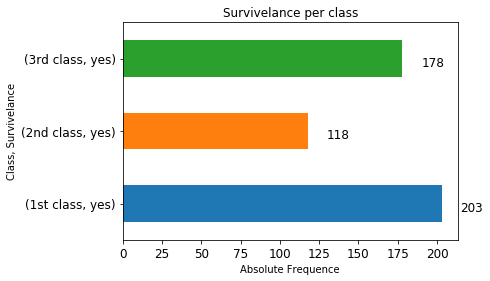

In [6]:
# Graph 'sobreviventes por categoria'
titanic[titanic['survived']=='yes'].groupby('class')['survived'].value_counts().plot(kind='barh', 
                                                                                     title='Survivelance per class', 
                                                                                     grid=False, 
                                                                                     fontsize=12)
plt.ylabel('Class, Survivelance')
plt.xlabel('Absolute Frequence')

nr_labels = list(titanic[titanic['survived']=='yes'].groupby('class')['survived'].value_counts())

for i, v in enumerate(nr_labels):
    plt.text(x = v + 12, y = i - .10, s= str(v), color='k', fontsize=12)

plt.show()

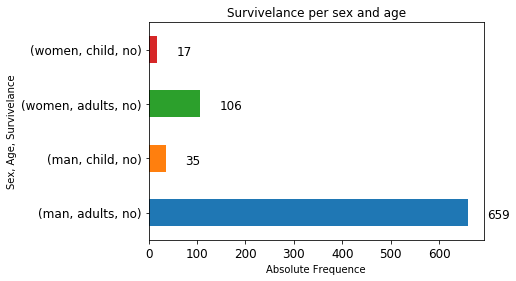

In [7]:
# Graph 'mortos por sexo e idade'
titanic[titanic['survived']=='no'].groupby(['sex', 'age'])['survived'].value_counts().plot(kind='barh', 
                                                                                           title='Survivelance per sex and age', 
                                                                                           grid=False, fontsize=12)
plt.ylabel('Sex, Age, Survivelance')
plt.xlabel('Absolute Frequence')

nr_labels = list(titanic[titanic['survived']=='no'].groupby(['sex', 'age'])['survived'].value_counts())

for i, v in enumerate(nr_labels):
    plt.text(x = v + 40, y = i - .10, s= str(v), color='k', fontsize=12)

plt.show()

##    Exercício 04. Construa histogramas para:
###    a) Titanic: categoria

3rd class    706
1st class    325
2nd class    285
Name: class, dtype: int64


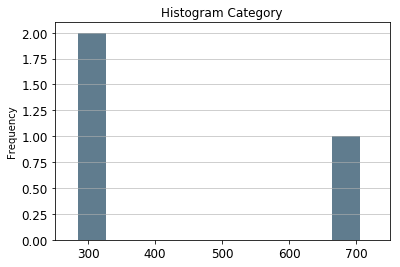

In [8]:
# Graph histogram
print(titanic['class'].value_counts())
titanic['class'].value_counts().plot(kind='hist', title='Histogram Category', fontsize=12, color='#607c8e')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 2.10)
plt.xlim(250, 750)
plt.show()

##    Exercício 05. Construa diagramas de ramos e folhas para:
###    a) Titanic: categoria

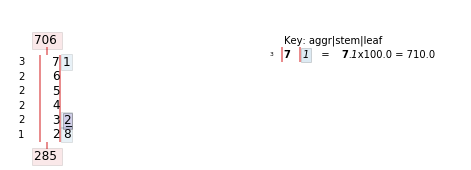

In [9]:
# pip install stemgraphic
graph = ste.stem_graphic(titanic.groupby('class').size())
plt.show(graph)

##    Exercício 06. Calcule a média aritmética para classe no Titanic

In [10]:
titanic.groupby('class').size().mean()

438.6666666666667

##    Exercício 07. Calcule a moda para classe no Titanic

In [11]:
result_moda = list(titanic['class'].mode())
titanic[titanic['class']==result_moda[0]].groupby('class').size()

class
3rd class    706
dtype: int64

##    Exercício 08. Calcule a mediana para classe no Titanic

In [12]:
titanic.groupby('class').size().median()

325.0

##    Exercício 09. Calcule as medidas de dispersão para classe no Titanic

In [13]:
desc = dict(titanic.groupby('class').size().describe())
list_titanic = list(titanic['class'].value_counts())

total_amplitude, interquart_amplitude, list_dict, standard_deviation = (desc['max']-desc['min'], 
                                                                        desc['75%']-desc['25%'], 
                                                                        [desc['75%'],desc['25%']],
                                                                       desc['std'])                                     
semi_interq_ampl = (list_dict[0]-list_dict[1])/(len(list_dict))
series_list = pd.Series(list_titanic)
mean_deviation, variance_value, coef_variation = (series_list.mad(), 
                                                  st.variance(list_titanic), 
                                                  (standard_deviation)/(st.mean(list_titanic)))

df_result = pd.DataFrame([('Total Amplitude', total_amplitude),
                          ('Interquart. Ampli.', interquart_amplitude),
                          ('semi-interquar. Ampl.', semi_interq_ampl),
                          ('Mean Deviation', mean_deviation),
                          ('Standard Deviation', standard_deviation),
                          ('Variance', variance_value),
                          ('Coefficient Variation', coef_variation)],
                         columns=['Dispersion Metric', 'Result'])
df_result

,Dispersion Metric,Result
0,Total Amplitude,421.000000
1,Interquart. Ampli.,210.500000
2,semi-interquar. Ampl.,105.250000
3,Mean Deviation,178.222222
4,Standard Deviation,232.379718
5,Variance,54000.333333
6,Coefficient Variation,0.529741


##    Exercício 10. Determine e interprete as medidas de assimetria e curtose para classe no Titanic

In [14]:
# coeficiente de Pearson = (média - moda) / desvio padrão
def getMode():
    list_mode = list(titanic['class'].mode())
    list_mode = list(titanic[titanic['class'] == list_mode[0]].groupby('class').size())
    return list_mode[0]

def getStandardDeviation():
    desc = dict(titanic.groupby('class').size().describe())
    return desc['std']

mean_value = titanic.groupby('class').size().mean()
mode_value = getMode()
stand_deviation = getStandardDeviation()
median_value = titanic.groupby('class').size().median()

coef_pearson = (mean_value - mode_value)/(stand_deviation)

if (coef_pearson == 0) or (mean_value == median_value and median_value == mode_value):
    print('A medida de assimetria é: simétrica! \n Resultado: {}'.format(coef_pearson))
elif (coef_pearson < 0) or (mean_value <= median_value and median_value <= mode_value):
    print('A medida de assimetria é: Assimétrica negativa! \n Resultado: {}'.format(coef_pearson))
elif (coef_pearson > 0) or (mean_value <= median_value and median_value <= mode_value):
    print('A medida de assimetria é: Assimétrica positiva! \n Resultado: {}'.format(coef_pearson))

A medida de assimetria é: Assimétrica negativa! 
 Resultado: -1.1504159469902164


In [15]:
# curtose = (Quartil3 - Quartil1)/ 2* (Percentil90-Percentil10)
def getTotalAmplitude():
    desc = dict(titanic.groupby('class').size().describe())
    q3 = desc['75%']
    q1 = desc['25%']
    return q3 - q1

total_amplitude = getTotalAmplitude()
p90 = np.percentile(list(titanic['class'].value_counts()), 90)
p10 = np.percentile(list(titanic['class'].value_counts()),10)

k = (total_amplitude)/(2 * (p90 - p10))

if (k < 0.263):
    print('A distribuição referente ao grau de achatamento é Leptocúrtica! \n Curtose = {}'.format(k))
elif (k == 0.263):
    print('A distribuição referente ao grau de achatamento é Mesocúrtica! \n Curtose = {}'.format(k))
else:
    print('A distribuição referente ao grau de achatamento é Platicúrtica! \n Curtose = {}'.format(k))

A distribuição referente ao grau de achatamento é Platicúrtica! 
 Curtose = 0.31249999999999994


##    Exercício 11. Faça o gráfico Box Plot para classe no Titanic

3rd class    706
1st class    325
2nd class    285
Name: class, dtype: int64


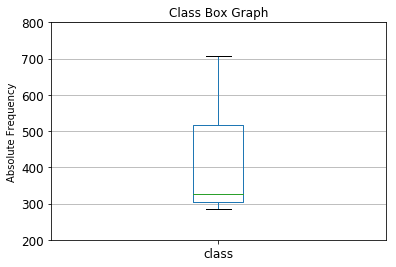

In [16]:
print(titanic['class'].value_counts())
titanic['class'].value_counts().plot(kind='box', title='Class Box Graph', fontsize=12)
plt.grid(axis='y')
plt.ylim(200,800)
plt.ylabel('Absolute Frequency')
plt.show()